# Models

### Input

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from datetime import datetime, timedelta


## Prescriptive Analysis : Baseline

### METHOD 1 : T-1 

In [136]:
df = pd.read_csv("data/final_df_drop.csv", index_col = 0)
df.sort_values(["Date", "State"], inplace = True)
df.reset_index(drop = True, inplace = True)
df

,State,Date,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate,TestsReported
0,Alabama,2020-04-12,4903185.0,3563,93,75.99,2.61,460.30,2165
1,Alaska,2020-04-12,731545.0,272,8,45.50,2.94,1344.71,262
2,Arizona,2020-04-12,7278717.0,3542,115,48.66,3.25,578.52,1119
3,Arkansas,2020-04-12,3017804.0,1280,27,49.44,2.11,761.75,625
4,California,2020-04-12,39512223.0,22795,640,58.14,2.81,485.42,10816
...,...,...,...,...,...,...,...,...,...
7171,Virginia,2020-08-27,8535519.0,116569,2527,1365.69,2.17,17661.98,17503
7172,Washington,2020-08-27,7614893.0,72703,1890,954.75,2.60,18270.89,14511
7173,West Virginia,2020-08-27,1792147.0,9633,198,537.51,2.06,23090.13,5681
7174,Wisconsin,2020-08-27,5822434.0,73138,1111,1256.14,1.52,21065.04,28825


In [39]:
df[df.State == "Wyoming"]

,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported
51,Wyoming,2020-04-12,578759.0,270,0,137.0,40.0,14.81,54.30,0.00,1097.86,0
103,Wyoming,2020-04-13,578759.0,275,1,138.0,41.0,14.91,55.31,0.36,1199.42,347
155,Wyoming,2020-04-14,578759.0,282,1,140.0,43.0,15.25,56.71,0.35,1199.42,0
207,Wyoming,2020-04-15,578759.0,287,1,129.0,43.0,14.98,57.72,0.35,1272.83,15
259,Wyoming,2020-04-16,578759.0,296,2,148.0,43.0,14.53,59.53,0.68,1292.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7175,Wyoming,2020-08-27,578759.0,3733,37,3060.0,215.0,5.76,645.00,0.99,12877.90,502
7227,Wyoming,2020-08-28,578759.0,3803,37,3086.0,0.0,0.00,657.10,0.97,12999.54,1107
7279,Wyoming,2020-08-29,578759.0,3795,37,3116.0,0.0,0.00,655.71,0.97,13003.17,1186
7331,Wyoming,2020-08-30,578759.0,3829,37,3136.0,0.0,0.00,661.59,0.97,13009.39,313


### Standardization

In [137]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[list(df.columns)[2:-1]])
for i, col in enumerate(list(df.columns)[2:-1]):
    df[col] = scaled[:, i]
df

,State,Date,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate,TestsReported
0,Alabama,2020-04-12,0.111072,0.004762,0.002825,0.014638,0.267967,0.008417,2165
1,Alaska,2020-04-12,0.003924,0.000003,0.000243,0.004809,0.301848,0.027350,262
2,Arizona,2020-04-12,0.172087,0.004731,0.003493,0.005828,0.333676,0.010948,1119
3,Arkansas,2020-04-12,0.062646,0.001460,0.000820,0.006080,0.216632,0.014871,625
4,California,2020-04-12,1.000000,0.032572,0.019438,0.008884,0.288501,0.008955,10816
...,...,...,...,...,...,...,...,...,...
7171,Virginia,2020-08-27,0.204368,0.168171,0.076748,0.430374,0.222793,0.376656,17503
7172,Washington,2020-08-27,0.180722,0.104740,0.057401,0.297907,0.266940,0.389691,14511
7173,West Virginia,2020-08-27,0.031166,0.013539,0.006013,0.163409,0.211499,0.492857,5681
7174,Wisconsin,2020-08-27,0.134683,0.105369,0.033742,0.395060,0.156057,0.449505,28825


In [138]:
df["TestsReported"].describe()

count      7176.000000
mean      11851.173913
std       17897.180706
min           0.000000
25%        2447.750000
50%        5785.000000
75%       13614.750000
max      153481.000000
Name: TestsReported, dtype: float64

### Model Implementation

In [139]:
X_train = df[df.Date == "2020-04-13"].iloc[:, 2:-1]
X_train

,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate
52,0.111072,0.005009,0.003007,0.015811,0.272074,0.011887
53,0.003924,0.000010,0.000243,0.005080,0.296715,0.026605
54,0.172087,0.004967,0.003705,0.006550,0.337782,0.011312
55,0.062646,0.001648,0.000881,0.007698,0.211499,0.015765
56,1.000000,0.034214,0.021685,0.009819,0.306982,0.008986
57,0.133047,0.010731,0.009294,0.033892,0.408624,0.012743
58,0.076709,0.018959,0.018283,0.111124,0.462012,0.025168
59,0.010146,0.002152,0.001245,0.048340,0.239220,0.024549
60,0.003262,0.002437,0.001579,0.079437,0.273101,0.031729
61,0.536787,0.030004,0.015155,0.176909,0.042094,0.018346


5.0


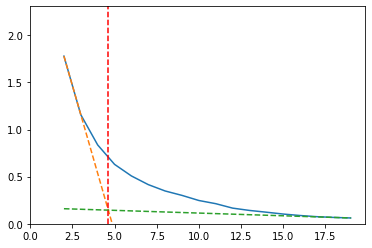

In [140]:
res = []
for k in range(2, 20):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    res.append(-model.score(X_train))

pente1 = [(res[1] - res[0])* x + res[0] for x in[i for i in range(18)]]
pente2 = [(res[17] - res[16])* (x - 17)+ res[17]for x in[i for i in range(18)]]
k_chosen = (res[17] - res[0] + 17*(res[16] - res[17]))/(res[1] - res[0] + res[16] - res[17]) + 2
print(round(k_chosen, 0))
plt.plot([i for i in range(2, 20)], res)
plt.plot([i for i in range(2, 20)], pente1, linestyle='--')
plt.plot([i for i in range(2, 20)], pente2, linestyle='--')
plt.axvline(x=k_chosen, color='red', linestyle='--', )
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

In [141]:
def finding_elbow(l):
    #pente1 = [(res[1] - res[0])* x + res[0] for x in[i for i in range(18)]]
    #pente2 = [(res[17] - res[16])* (x - 17)+ res[17]for x in[i for i in range(18)]]
    k_chosen = (l[17] - l[0] + 17*(l[16] - l[17]))/(l[1] - l[0] + l[16] - l[17]) + 2
    return int(round(k_chosen, 0))

In [142]:
all_dates = list(df.Date.unique())[2:]
scores = []
pred = []
for date in all_dates:
    res = []
    res.append(date)
    X_train = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_train = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].loc[:, "TestsReported"]
    X_test = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_test = df[df.Date == date].loc[:, "TestsReported"]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    res.append(k_chosen)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    for x in knn.kneighbors(X_test)[1]:
        pred.append(np.mean(y_train.iloc[x]))
    res.append(r2_score(y_test, pred[-len(y_test):]))
    res.append(mean_absolute_error(y_test, pred[-len(y_test):]))
    scores.append(res)
    
df_pred = df[df.Date >= "2020-04-14"]
df_pred["Preds"] = pred
df_pred


<ipython-input-142-a5a35cff0c2b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["Preds"] = pred


,State,Date,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate,TestsReported,Preds
104,Alabama,2020-04-14,0.111072,0.005326,0.003462,0.017320,0.295688,0.013683,2942,1795.25
105,Alaska,2020-04-14,0.003924,0.000022,0.000273,0.005512,0.324435,0.028460,398,308.25
106,Arizona,2020-04-14,0.172087,0.005117,0.003979,0.007011,0.353183,0.011533,2575,1914.25
107,Arkansas,2020-04-14,0.062646,0.001776,0.000972,0.008794,0.219713,0.016036,780,1038.00
108,California,2020-04-14,1.000000,0.036275,0.023295,0.010989,0.311088,0.009604,21999,7427.50
...,...,...,...,...,...,...,...,...,...,...
7171,Virginia,2020-08-27,0.204368,0.168171,0.076748,0.430374,0.222793,0.376656,17503,20149.60
7172,Washington,2020-08-27,0.180722,0.104740,0.057401,0.297907,0.266940,0.389691,14511,13237.80
7173,West Virginia,2020-08-27,0.031166,0.013539,0.006013,0.163409,0.211499,0.492857,5681,4813.60
7174,Wisconsin,2020-08-27,0.134683,0.105369,0.033742,0.395060,0.156057,0.449505,28825,14759.80


In [143]:
scores = pd.DataFrame(scores, columns = ["Date", "Nb Clusters", "R2", "MAE"])
scores

,Date,Nb Clusters,R2,MAE
0,2020-04-14,4,0.359822,1893.927885
1,2020-04-15,5,0.351743,1947.700000
2,2020-04-16,5,0.436961,1914.596154
3,2020-04-17,4,0.479065,1936.548077
4,2020-04-18,5,0.520524,1575.561538
...,...,...,...,...
131,2020-08-23,5,0.574996,5857.738462
132,2020-08-24,5,0.805683,4483.892308
133,2020-08-25,5,0.398030,9099.776923
134,2020-08-26,5,0.495851,9351.019231


In [144]:
scores[["Nb Clusters", "R2", "MAE"]].describe()

,Nb Clusters,R2,MAE
count,136.000000,136.000000,136.000000
mean,4.970588,0.618796,5140.031971
std,0.169582,0.150061,2226.309049
min,4.000000,0.261609,1575.561538
25%,5.000000,0.508804,3232.494231
50%,5.000000,0.651338,4909.980769
75%,5.000000,0.725215,6570.849038
max,5.000000,0.900631,10183.211538


### METHOD 2 : Previous T

In [ ]:
all_dates = list(df.Date.unique())[2:]
scores = []
pred = []
for date in all_dates:
    res = []
    res.append(date)
    X_train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].loc[:, "TestsReported"]
    X_test = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_test = df[df.Date == date].loc[:, "TestsReported"]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    res.append(k_chosen)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    for x in knn.kneighbors(X_test)[1]:
        pred.append(np.mean(y_train.iloc[x]))
    res.append(r2_score(y_test, pred[-len(y_test):]))
    res.append(mean_absolute_error(y_test, pred[-len(y_test):]))
    scores.append(res)
    
df_pred = df[df.Date >= "2020-04-14"]
df_pred["Preds"] = pred
df_pred


<ipython-input-149-29d330a4eb7a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["Preds"] = pred


,State,Date,population,confirmed,deaths,recovered,people_hospitalized,hospitalization_rate,incident_rate,mortality_rate,testing_rate,TestsReported,Preds
104,Alabama,2020-04-14,0.111072,0.005171,0.003459,0.000000,0.005478,0.323896,0.017018,0.295688,0.012930,2942,1747.000000
105,Alaska,2020-04-14,0.003924,0.000021,0.000273,0.000193,0.000356,0.291688,0.005416,0.324435,0.026893,398,400.250000
106,Arizona,2020-04-14,0.172087,0.004969,0.003975,0.000491,0.006445,0.395584,0.006889,0.353183,0.010898,2575,1328.250000
107,Arkansas,2020-04-14,0.062646,0.001724,0.000971,0.000841,0.001445,0.225455,0.008641,0.219713,0.015153,780,592.750000
108,California,2020-04-14,1.000000,0.035223,0.023273,0.000000,0.057370,0.528831,0.010798,0.311088,0.009075,21999,7427.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Virginia,2020-08-31,0.204368,0.168919,0.078284,0.029724,0.000000,0.000000,0.437747,0.219713,0.374638,13976,18371.500000
7380,Washington,2020-08-31,0.180722,0.104415,0.058106,0.000000,0.000000,0.000000,0.300755,0.263860,0.386838,6058,10403.333333
7381,West Virginia,2020-08-31,0.031166,0.014011,0.006524,0.015797,0.000000,0.000000,0.171450,0.215606,0.490816,3577,5539.166667
7382,Wisconsin,2020-08-31,0.134683,0.105774,0.034044,0.132481,0.000000,0.000000,0.401591,0.151951,0.434106,16571,13499.333333


In [ ]:
scores = pd.DataFrame(scores, columns = ["Date", "Nb Clusters", "R2", "MAE"])
scores

,Date,Nb Clusters,R2,MAE
0,2020-04-14,4,0.348365,1962.716346
1,2020-04-15,4,0.508762,1648.764423
2,2020-04-16,5,0.599022,1603.557692
3,2020-04-17,4,0.828644,1156.274038
4,2020-04-18,5,0.917978,747.976923
...,...,...,...,...
135,2020-08-27,6,0.898942,4339.064103
136,2020-08-28,6,0.936101,3336.102564
137,2020-08-29,6,0.633781,4997.288462
138,2020-08-30,6,0.561134,6724.894231


In [ ]:
scores[["Nb Clusters", "R2", "MAE"]].describe()

,Nb Clusters,R2,MAE
count,140.000000,140.000000,140.000000
mean,5.342857,0.844007,2894.502003
std,0.519704,0.141754,1268.026145
min,4.000000,0.348365,747.976923
25%,5.000000,0.810382,1915.814103
50%,5.000000,0.880916,2744.603205
75%,6.000000,0.945936,3521.517308
max,6.000000,0.978268,6983.696154


### Cost Function

To product : --> $2 (https://www.reuters.com/business/healthcare-pharmaceuticals/rapid-covid-19-tests-increasingly-scarce-pricey-demand-employers-jumps-2021-10-05/)

Price sell ? --> $45 on average (https://www.healthsystemtracker.org/brief/prices-for-covid-19-testing/#:~:text=This%20analysis%20finds%20typical%20private,%2491%20for%20a%20PCR%20test.)


cost ? : c(z, y) = 2*z - 45*min(z, y) + 10*max(z-y, 0)

In [ ]:
def cost(z, y):
    #return 2*z - 45*min([z, y]) + 10*max([z-y, 0])
    return 2*z - 10*min([z, y])

### Getting only the Index : T-1

In [145]:
all_dates = list(df.Date.unique())[2:]
neighbors = []
value_neighbors = []
count = 0
for date in all_dates:
    X_train = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_train = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=2)).strftime('%Y-%m-%d'))].loc[:, "TestsReported"]
    X_test = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    for x in knn.kneighbors(X_test)[1]:
        neighbors.append(np.array(x) + (count*52))
        value_neighbors.append(list(y_train[np.array(x) + (count*52)]))
    count +=1
    

copy = df[["State", "Date"]][df.Date >= "2020-04-14"]
copy["Neighbors"] = neighbors
copy["Value"] = value_neighbors
final_pred = df.copy()
final_pred = final_pred.merge(copy, how = "left", on = ["State", "Date"])
final_pred

,State,Date,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate,TestsReported,Neighbors,Value
0,Alabama,2020-04-12,0.111072,0.004762,0.002825,0.014638,0.267967,0.008417,2165,NaN,NaN
1,Alaska,2020-04-12,0.003924,0.000003,0.000243,0.004809,0.301848,0.027350,262,NaN,NaN
2,Arizona,2020-04-12,0.172087,0.004731,0.003493,0.005828,0.333676,0.010948,1119,NaN,NaN
3,Arkansas,2020-04-12,0.062646,0.001460,0.000820,0.006080,0.216632,0.014871,625,NaN,NaN
4,California,2020-04-12,1.000000,0.032572,0.019438,0.008884,0.288501,0.008955,10816,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7171,Virginia,2020-08-27,0.204368,0.168171,0.076748,0.430374,0.222793,0.376656,17503,"[7067, 7045, 7043, 7053, 7070]","[15092, 20376, 17327, 26879, 21074]"
7172,Washington,2020-08-27,0.180722,0.104740,0.057401,0.297907,0.266940,0.389691,14511,"[7068, 7025, 7043, 7037, 7045]","[10088, 8126, 17327, 10272, 20376]"
7173,West Virginia,2020-08-27,0.031166,0.013539,0.006013,0.163409,0.211499,0.492857,5681,"[7069, 7046, 7039, 7037, 7066]","[4703, 1734, 4950, 10272, 2409]"
7174,Wisconsin,2020-08-27,0.134683,0.105369,0.033742,0.395060,0.156057,0.449505,28825,"[7070, 7056, 7043, 7037, 7045]","[21074, 4750, 17327, 10272, 20376]"


In [146]:
final_pred.to_csv("data/pred_t_1.csv")

### Getting only the index : Previous T

In [147]:
all_dates = list(df.Date.unique())[2:]
neighbors = []
value_neighbors = []
for date in all_dates:
    X_train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    y_train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].loc[:, "TestsReported"]
    X_test = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    for x in knn.kneighbors(X_test)[1]:
        neighbors.append(np.array(x))
        value_neighbors.append(list(y_train[np.array(x)]))
    

copy = df[["State", "Date"]][df.Date >= "2020-04-14"]
copy["Neighbors"] = neighbors
copy["Value"] = value_neighbors
final_pred = df.copy()
final_pred = final_pred.merge(copy, how = "left", on = ["State", "Date"])
final_pred

,State,Date,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate,TestsReported,Neighbors,Value
0,Alabama,2020-04-12,0.111072,0.004762,0.002825,0.014638,0.267967,0.008417,2165,NaN,NaN
1,Alaska,2020-04-12,0.003924,0.000003,0.000243,0.004809,0.301848,0.027350,262,NaN,NaN
2,Arizona,2020-04-12,0.172087,0.004731,0.003493,0.005828,0.333676,0.010948,1119,NaN,NaN
3,Arkansas,2020-04-12,0.062646,0.001460,0.000820,0.006080,0.216632,0.014871,625,NaN,NaN
4,California,2020-04-12,1.000000,0.032572,0.019438,0.008884,0.288501,0.008955,10816,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7171,Virginia,2020-08-27,0.204368,0.168171,0.076748,0.430374,0.222793,0.376656,17503,"[7119, 7067, 7015, 6963, 6911, 6859]","[20820, 15092, 13960, 14702, 20046, 20472]"
7172,Washington,2020-08-27,0.180722,0.104740,0.057401,0.297907,0.266940,0.389691,14511,"[7120, 5691, 5639, 6263, 6211, 6315]","[12517, 22654, 18012, 11383, 10946, 10205]"
7173,West Virginia,2020-08-27,0.031166,0.013539,0.006013,0.163409,0.211499,0.492857,5681,"[7121, 7069, 7017, 6965, 6913, 6861]","[4762, 4703, 6641, 3677, 4204, 8688]"
7174,Wisconsin,2020-08-27,0.134683,0.105369,0.033742,0.395060,0.156057,0.449505,28825,"[7122, 7070, 7018, 6966, 6914, 6862]","[21167, 21074, 13229, 16369, 13442, 19340]"


In [148]:
final_pred.to_csv("data/pred_prev_t.csv")

# Time Series Model 

Comment faire ?

- faire en sorte que certains points plus proche temporellement soit mieux weighted !

### Old Code

In [ ]:
all_dates = list(df.Date.unique())[2:]
neighbors = []
value_neighbors = []

for date in all_dates:
    print(date)
    train = df[(df.Date <= (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))]
    X_test = df[(df.Date == (datetime.strptime(date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d'))].iloc[:, 2:-1]
    for index, row in X_test.iterrows():
        neighbors_x = []
        value_neighbors_x = []
        count = 0
        for prev_date in list(train.Date.unique()):
            sub_X_train = df[(df.Date == prev_date)].iloc[:, 2:-1]
            sub_y_train = df[(df.Date == prev_date)].loc[:, "TestsReported"]
            res_k = []
            for k in range(2, 20):
                model = KMeans(n_clusters=k)
                model.fit(sub_X_train)
                res_k.append(-model.score(sub_X_train))
            k_chosen = finding_elbow(res_k)
            knn = NearestNeighbors(n_neighbors=k_chosen)
            knn.fit(sub_X_train)
            knn_index = knn.kneighbors(X_test[X_test.index == index])[1][0]
            neighbors_x.append(np.array(knn_index) + (count*52))
            value_neighbors_x.append(list(sub_y_train[np.array(knn_index) + (count*52)]))
            count +=1
        neighbors.append(neighbors_x)
        value_neighbors.append(value_neighbors_x)
    

copy = df[["State", "Date"]][df.Date >= "2020-04-14"]
copy["Neighbors"] = neighbors
copy["Value"] = value_neighbors
final_pred = df.copy()
final_pred = final_pred.merge(copy, how = "left", on = ["State", "Date"])
final_pred

2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-19
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-25
2020-04-26
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-01
2020-05-02
2020-05-03
2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25


KeyboardInterrupt: 

In [ ]:
final_pred.to_csv("data/pred_temporal.csv")

### New Code

In [149]:
all_dates = list(df.Date.unique())[:-1]
n_points = len(df[df.Date >= "2020-04-13"])
neighbors = [[] for _ in range(n_points)]
value_neighbors = [[] for _ in range(n_points)]
count = 0

for date in all_dates:
    print(date)
    X_train = df[(df.Date == date)].iloc[:, 2:-1]
    y_train = df[(df.Date == date)].loc[:, "TestsReported"]
    X_test = df[(df.Date > date)].iloc[:, 2:-1]
    res_k = []
    for k in range(2, 20):
        model = KMeans(n_clusters=k)
        model.fit(X_train)
        res_k.append(-model.score(X_train))
    k_chosen = finding_elbow(res_k)
    knn = NearestNeighbors(n_neighbors=k_chosen)
    knn.fit(X_train)
    knn_index = knn.kneighbors(X_test)[1]
    knn_index = [np.array(x) + (count*52) for x in np.array(knn_index)]
    value_knn = list([list(y_train[x]) for x in knn_index])
    neighbors[-(n_points - count*52):] = [a + [list(b)] for a, b in zip(neighbors[-(n_points - count*52):], knn_index)]
    value_neighbors[-(n_points - count*52):] = [a + [list(b)] for a, b in zip(value_neighbors[-(n_points - count*52):], value_knn)]
    count += 1


copy = df[["State", "Date"]][df.Date >= "2020-04-13"]
copy["Neighbors"] = neighbors
copy["Value"] = value_neighbors
final_pred = df.copy()
final_pred = final_pred.merge(copy, how = "left", on = ["State", "Date"])
final_pred

2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-19
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-25
2020-04-26
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-01
2020-05-02
2020-05-03
2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30
2020-05-31
2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30
2020-07-01
2020-07-02
2020-07-03
2020-07-04
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11

,State,Date,population,confirmed,deaths,incident_rate,mortality_rate,testing_rate,TestsReported,Neighbors,Value
0,Alabama,2020-04-12,0.111072,0.004762,0.002825,0.014638,0.267967,0.008417,2165,NaN,NaN
1,Alaska,2020-04-12,0.003924,0.000003,0.000243,0.004809,0.301848,0.027350,262,NaN,NaN
2,Arizona,2020-04-12,0.172087,0.004731,0.003493,0.005828,0.333676,0.010948,1119,NaN,NaN
3,Arkansas,2020-04-12,0.062646,0.001460,0.000820,0.006080,0.216632,0.014871,625,NaN,NaN
4,California,2020-04-12,1.000000,0.032572,0.019438,0.008884,0.288501,0.008955,10816,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7171,Virginia,2020-08-27,0.204368,0.168171,0.076748,0.430374,0.222793,0.376656,17503,"[[30, 21, 18, 38], [82, 73, 70, 90, 92], [134,...","[[222, 7221, 1914, 5495], [502, 5881, 4748, 33..."
7172,Washington,2020-08-27,0.180722,0.104740,0.057401,0.297907,0.266940,0.389691,14511,"[[30, 21, 18, 40], [82, 73, 70, 92, 72], [134,...","[[222, 7221, 1914, 1059], [502, 5881, 4748, 46..."
7173,West Virginia,2020-08-27,0.031166,0.013539,0.006013,0.163409,0.211499,0.492857,5681,"[[40, 8, 31, 34], [92, 60, 83, 59, 86], [144, ...","[[1059, 547, 1921, 218], [467, 391, 853, 767, ..."
7174,Wisconsin,2020-08-27,0.134683,0.105369,0.033742,0.395060,0.156057,0.449505,28825,"[[30, 21, 18, 40], [82, 73, 92, 70, 60], [125,...","[[222, 7221, 1914, 1059], [502, 5881, 467, 474..."


In [150]:
final_pred.to_csv("data/pred_temporal.csv")